## Learning Curves
* Do we need more data or a better model?
    * One method is to provide the model with limited test data, then more and more per epoch. If the model is improving with the addition of more data, data was the answer. If the performance is not increasing, the model is most likely the issue. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()
X, y = digits.data, digits.target

In [6]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
X.shape

(1797, 64)

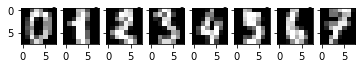

In [13]:
for i in range(8):
#     plt.figure(figsize=(20,20))
    plt.subplot(1,8,i+1)
    plt.imshow(X.reshape(-1,8,8)[i], cmap='gray')

In [14]:
from sklearn.model_selection import learning_curve

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping

In [16]:
K.clear_session()

In [20]:
model = Sequential()
model.add(Dense(16,input_shape=(64,), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

initial_weights = model.get_weights()

In [21]:
y_cat = to_categorical(y,10)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y_cat,test_size=0.3)

In [25]:
train_sizes = (len(X_train)* np.linspace(0.1,0.999,4)).astype(int)
train_sizes

array([ 125,  502,  879, 1255])

In [26]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = \
    train_test_split(X_train, y_train, train_size=train_size)
    
    # at each iteration reset the weights of the model
    # to the initial random weights
    model.set_weights(initial_weights)
    
    h = model.fit(X_train_frac, y_train_frac,
                  verbose=0,
                  epochs=300,
                  callbacks=[EarlyStopping(monitor='loss', patience=1)])

    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])
    
    e = model.evaluate(X_test, y_test, verbose=0)
    test_scores.append(e[-1])
    
    print("Done size: ", train_size)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

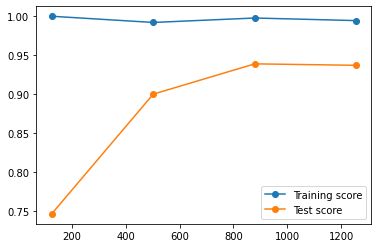

In [27]:
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.legend(loc="best")

## Batch Normalization
* Method of standardizing output layer by layer
    * At each layer, we calculate mean and variance.
    * Then we subtract the mean and divide by variance to normalize the batch data
    * Then, the normalized data is scaled by Gamma and Beta, two values derived from training. 
    * Helps to increase accuracy and improves training times. 

In [28]:
from keras.layers import BatchNormalization

In [36]:
def repeated_training(X_train,
                      y_train,
                      X_test,
                      y_test,
                      units=512, 
                      activation='sigmoid',
                      optimizer='sgd',
                      do_bn=False,
                      epochs=10,
                      repeats=3):
    histories = []
    
    for repeat in range(repeats):
        K.clear_session()

        model = Sequential()
        
        # first fully connected layer
        model.add(Dense(units,
                        input_shape=X_train.shape[1:],
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # second fully connected layer
        model.add(Dense(units,
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # third fully connected layer
        model.add(Dense(units,
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # output layer
        model.add(Dense(10, activation='softmax'))
        
        model.compile(optimizer,
                      'categorical_crossentropy',
                      metrics=['accuracy'])

        h = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=epochs,
                      verbose=0)
        histories.append([h.history['loss'], h.history['accuracy']])
        print(repeat, end=' ')

    histories = np.array(histories)
    
    # calculate mean and standard deviation across repeats:
    mean_acc = histories.mean(axis=0)
    std_acc = histories.std(axis=0)
    print()
    
    return mean_acc[0], std_acc[0], mean_acc[1], std_acc[1]

In [37]:
mean_acc, std_acc, mean_acc_val, std_acc_val = \
    repeated_training(X_train, y_train, X_test, y_test, do_bn=False)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [38]:
mean_acc_bn, std_acc_bn, mean_acc_val_bn, std_acc_val_bn = \
    repeated_training(X_train, y_train, X_test, y_test, do_bn=True)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [40]:
def plot_mean_std(m, s):
    plt.plot(m)
    plt.fill_between(range(len(m)), m-s, m+s, alpha=0.1)

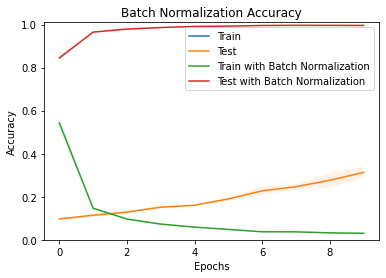

In [44]:
plot_mean_std(mean_acc, std_acc)
plot_mean_std(mean_acc_val, std_acc_val)
plot_mean_std(mean_acc_bn, std_acc_bn)
plot_mean_std(mean_acc_val_bn, std_acc_val_bn)
# plt.figure(figsize=(20,10))
plt.ylim(0, 1.01)
plt.title("Batch Normalization Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')


* This visualization shows us the convergence of the test set is dramatically better when using batch normalization. 

## Dropout Layers
* A Fully connected network has many parameters and risks overfitting data. 
* Randomly killing nodes per iteration allows the model to generalize better.
* This process adds a "probablility of being dropped" parameter to each node. 
    * this parameter is only present in training. 
* Dropping nodes allows the model to not form "habits" on which parameters and nodes communicate. This again prevents intense overfitting. 
* The dropout layer also allows for better classification and results due to the robust nature of the nodes. The addition of dropout layers allows for the model to produce lower error rates on test data. 

In [45]:
from keras.layers import Dropout

In [46]:
model = Sequential()
# 20% dropout of nodes
model.add(Dropout(0.2, input_shape=X_train.shape[1:]))
# first fully connected layer
model.add(Dense(512, kernel_initializer='normal',
                kernel_regularizer='l2', activation='sigmoid'))
# 40% dropout of nodes
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile('sgd',
              'categorical_crossentropy',
              metrics=['accuracy'])

## Data Augmentation
* Creating more data when we need it. 
* Images are easy to generate. Moving an image by a single pixel allows for the generation of 4 new images. Meaning the image will be shifted up, down, left, and right to generate the 4 new images. 
* Similarly, images can ge rotated, zoomed in/out, flipped, and more. 

In [56]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale = 1./255,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rotation_range = 20,
                               shear_range = 0.3,
                               zoom_range = 0.3,
                               horizontal_flip = True)

In [57]:
train = generator.flow_from_directory('data/generator',
                                      target_size = (128, 128),
                                      batch_size = 32,
                                      class_mode = 'binary')

Found 1 images belonging to 1 classes.


In [58]:
plt.figure(figsize=(12, 12))
for i in range(16):
    img, label = train.next()
    plt.subplot(4, 4, i+1)
    plt.imshow(img[0])

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

<Figure size 864x864 with 0 Axes>

## Continuous Learning
* Essentially starting with a base dataset with data and labels
* Afterward we train on new data which has been altered. 
* And repeat
* Good for Images, Sound, and Text
### Notes:
* Epoch is not well defined here
* Batch size should be defined
* Monitor progress and finish training when performance is "Good Enough". 

## Hyperparameter Tuning
* Architecture, regularization/normalization, and optimizers are all custimizable. 
* This fact means we should attempt to optimize all of them in order to produce adequate models.
* This can be done through iterative methods.

* Experiment:
    * Set up hypotheses of which parameters to tinker with
    * Train for a set amount of epochs
    * Check train/test scores
* Three Methods can be employed to determine which parameters are to be tested
    * Grid Search:
        * Assigning ranges to each parameter, then sampling within the range
        * Random samples are best
    * Bayesian Optimization
        * Intelligent search of hyper-parameter combination
        * Sequential design strategy for global optimization of neural nets
        * Doesn't require derivatives, where gradient descent does.
        * Assumes prior probability distribution of score
        * Gets scores iteratively
        * Updates the distribution

## Embeddings
* Takes large sparse vector and fully connects it to a smaller set of nodes. 
    * Usually for text vectors
* 